In [137]:
#Step 1: Import & Read Data
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('historic_fraud_activity.csv')

df.shape

(6362620, 11)

In [138]:
#Step 2: Data Understanding
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [148]:
df.dtypes


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [214]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [270]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Univariate, Bivariate & Multivariate Analysis

In [271]:
df.value_counts('type')

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Univariate Analysis

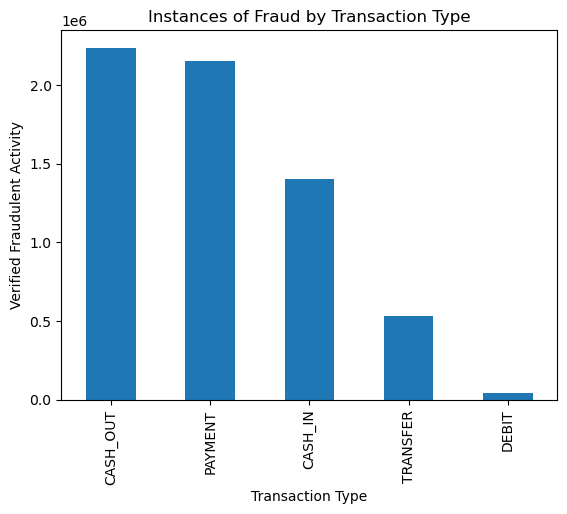

In [331]:
ax = df['type'].value_counts().head(10).plot(kind='bar', title='Instances of Fraud by Transaction Type')
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Verified Fraudulent Activity')
plt.show()


In [332]:
df.value_counts("isFlaggedFraud")

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [333]:
df.value_counts("isFraud")

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [334]:
df.shape

(6362620, 11)

In [335]:
df.value_counts("isFraud")

isFraud
0    6354407
1       8213
Name: count, dtype: int64

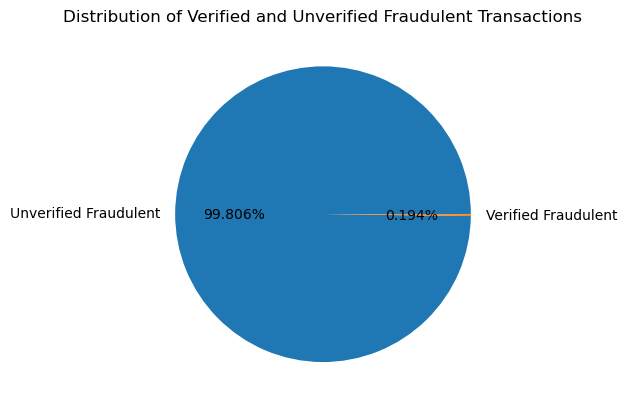

In [336]:
size = [8213, 16]
labels = ['Unverified Fraudulent', 'Verified Fraudulent']
plt.pie(size, labels=labels, autopct='%1.3f%%', colors=sns.color_palette("tab10"))
plt.title("Distribution of Verified and Unverified Fraudulent Transactions")
plt.show()

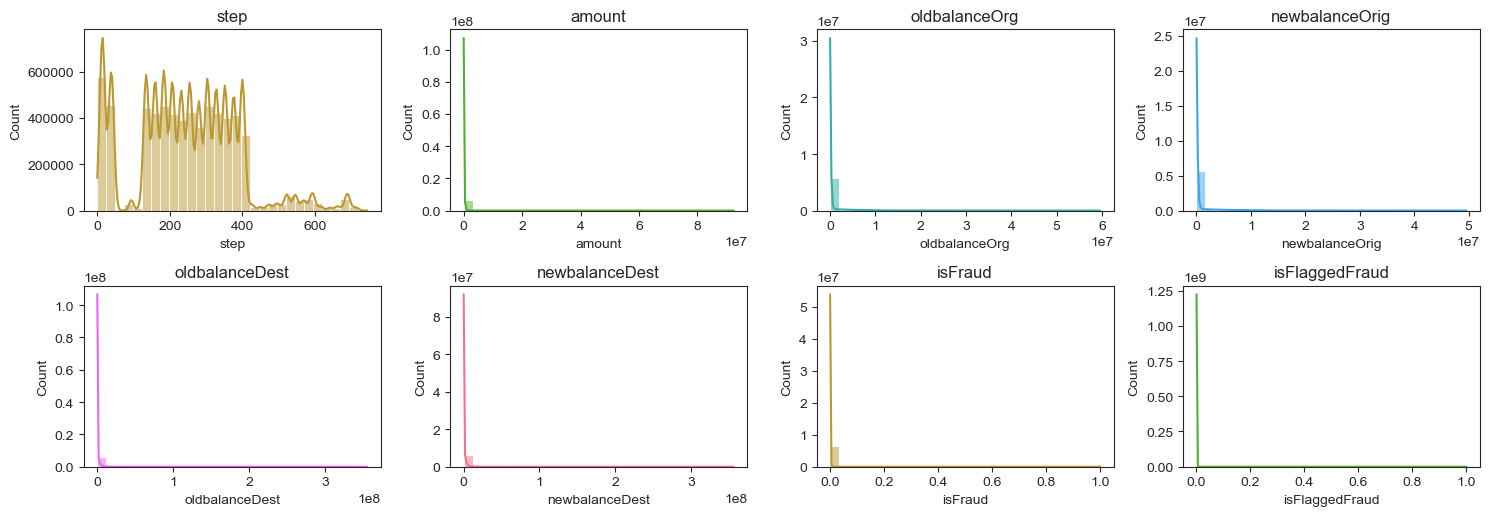

In [340]:
new_df = df.drop(columns=['nameOrig', 'nameDest'])

sns.set_style (style="ticks")

numerical_cols = new_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, bins=30, color=sns.color_palette("PuBu")[i % len(sns.color_palette("PuBu"))])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()


Bivariate Analysis

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


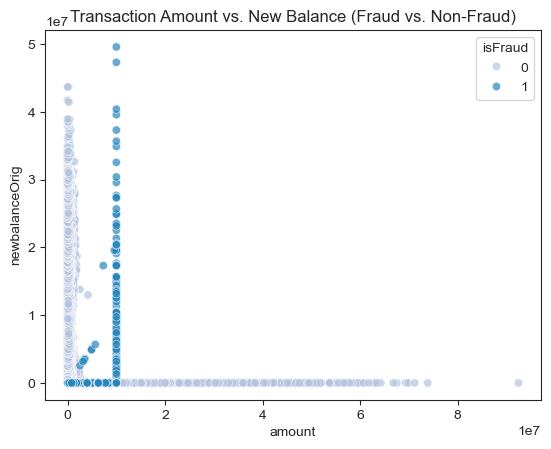

In [346]:
#scatter,line, bar

sns.set_style("ticks")

sns.scatterplot(
    data=df, 
    x='amount', 
    y='newbalanceOrig', 
    hue='isFraud', 
    palette='PuBu', 
    alpha=0.7
    )
plt.title('Transaction Amount vs. New Balance (Fraud vs. Non-Fraud)')
plt.show()

Multivariate Analysis

In [339]:
#scatterplots, heat maps, small multiples

# Calculate the balance difference
df['BalanceDiff'] = df['OldbalanceDest'] - df['NewbalanceDest']

# Create a new column to indicate increase or decrease (optional)
df['BalanceChange'] = df['BalanceDiff'].apply(lambda x: 'Decrease' if x > 0 else ('Increase' if x < 0 else 'No Change'))


# Compute the correlation matrix
corr_matrix = df[['amount', 'oldbalanceDest', 'newbalanceDest', 'balanceDiff', 'isFraud']].corr()


# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()